## Algorithms Specialist Tasks

In [57]:
# Importing the necessary libraries for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import os

For this assignnment, we were given two datasets to work with. One was the portugese class data, while the other was for the math class. Our objective is to analyze the dataset and make insights and reccommendations based on the analysis.
For the purpose of the assignment, we will only be taking a look at the portugese class data

In [58]:
portugal = pd.read_csv("C:\\Users\\obay\\OneDrive\\Documents\\student\\student-por.csv", sep=';') # Reading in the datasets
math = pd.read_csv("C:\\Users\\obay\\OneDrive\\Documents\\student\\student-mat.csv", sep=';')

In [59]:
portugal.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Searching Algorithms

We begin by using the search algorithms to find key metric or values based on the student's final grades (G3) in their portugese class. Our main objective will be to define the highest grade in the data set and iterate through the dataset to find the indices of the students with that gradde.

## Linear Search

In [60]:
def LinearSearch(target, lyst):  # Defining the linear search function
    position = 0 
    while position < len(lyst):
        if target == lyst[position]:
            return position 
        position += 1 
    return -1

In [61]:
highest_first_period_grade = LinearSearch(max(portugal["G1"]), portugal["G1"])  # locating index for student with highest grade in first period class
highest_second_period_grade = LinearSearch(max(portugal["G2"]), portugal["G2"])  # locating index for student with highest grade in second period class
highest_final_grade = LinearSearch(max(portugal["G3"]), portugal["G3"])    # locating index for student with highest final grade


print(f"Student with the highest first-period grade first occurs at index: {highest_first_period_grade}")
print(f"Student with the highest second-period grade first occurs at index: {highest_second_period_grade}")
print(f"Student with the highest final grade first occurs at index: {highest_final_grade}")

Student with the highest first-period grade first occurs at index: 617
Student with the highest second-period grade first occurs at index: 338
Student with the highest final grade first occurs at index: 338


## Binary Search

In [62]:
def binary_search(target, lyst):
    """
    Perform binary search to find the index of the target element in the given sorted array.

    Parameters:
    arr (list): Sorted list of elements to be searched.
    target: Element to be searched for in the array.

    Returns:
    int: Index of the target element if found, otherwise -1.
    """
    left, right = 0, len(lyst) - 1

    while left <= right:
        mid = (left + right) // 2
        if lyst[mid] == target:
            return mid
        elif lyst[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return - 1

In [63]:
def binarySearch(target, lyst): # Defining the binary search function
     """Returns the position of the target item if found, 
     or -1 otherwise.""" 
     left = 0 
     right = len(lyst) - 1 
     while left <= right: 
         midpoint = (left + right) // 2 
         if target == lyst[midpoint]: 
            return midpoint 
         elif target < lyst[midpoint]: 
            right = midpoint - 1        
         else:
            left = midpoint + 1         
     return -1

In [64]:
binary_highest_first_period_grade = binary_search(max(portugal["G1"]), sorted(portugal["G1"]))
#binary_highest_first_period_grade = binary_search(max(portugal["G1"]), portugal["G1"])
binary_highest_second_period_grade = binary_search(max(portugal["G2"]), sorted(portugal["G2"]))
binary_highest_final_grade = binary_search(max(portugal["G3"]), sorted(portugal["G3"]))

print(f"Student with the highest first-period grade first occurs at index: {binary_highest_first_period_grade}")
print(f"Student with the highest second-period grade first occurs at index: {binary_highest_second_period_grade}")
print(f"Student with the highest final grade first occurs at index: {binary_highest_final_grade}")

Student with the highest first-period grade first occurs at index: 648
Student with the highest second-period grade first occurs at index: 648
Student with the highest final grade first occurs at index: 647


After manually sorting each of the 3 columns, the code is ready to perform a binary search. The maximum grades for the 3 periods are located at 648, 648, and 647 respectively

We use while loops to find the indices of the highest and lowest final grade scoreres and store them in a list to compare. First we define a search function that takes in an extra 'DataFrame" argument. After that, we create an empty list that will house our indices once the loop is completed. Below, we print off the lists and display them in df format.

In [65]:
def find_all_indices(dataframe, lyst, target):
    indices = []  # This will store the indices of the students who match the criteria
    position = 0  # Starting position in the dataframe
    while position < len(dataframe):
        if dataframe.iloc[position][lyst] == target:  # Check if the student has the specific feature
            indices.append(position)  # Add the index of the student to the list
        position += 1  # Move to the next position
    return indices

# For example, to find students with a final grade (G3) of 18:
Highest_Grade_indices = find_all_indices(portugal, "G3", max(portugal["G3"]))
Lowest_Grade_indices = find_all_indices(portugal, "G3", min(portugal["G3"]))
print(Highest_Grade_indices)
print("\n")
print(Lowest_Grade_indices)


portugal.iloc[Highest_Grade_indices]
portugal.iloc[Lowest_Grade_indices]

[338, 636]


[163, 440, 519, 563, 567, 583, 586, 597, 603, 605, 610, 626, 637, 639, 640]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,11,9,0
440,MS,M,16,U,GT3,T,1,1,at_home,services,...,5,4,5,4,5,3,0,7,0,0
519,MS,M,16,R,GT3,T,2,1,other,services,...,5,2,1,1,1,2,0,8,7,0
563,MS,M,17,U,GT3,T,2,2,other,other,...,1,2,1,2,3,5,0,7,0,0
567,MS,M,18,R,GT3,T,3,2,services,other,...,2,3,1,2,2,5,0,4,0,0
583,MS,F,18,R,GT3,T,2,2,other,other,...,5,5,5,1,1,3,0,8,6,0
586,MS,F,17,U,GT3,T,4,2,teacher,services,...,5,5,5,1,3,5,0,8,8,0
597,MS,F,18,R,GT3,T,2,2,at_home,other,...,4,3,3,1,1,4,0,9,0,0
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0
605,MS,F,19,U,GT3,T,1,1,at_home,services,...,5,5,5,2,3,2,0,5,0,0


Below, we calculate the effeciency of the above search algorithm and will compare it with the previous algorithms later in the project.
We use the time library to find the start and end time of the code, which we can subtract to find the total runtime (effeciency) of the algorithm

## Sorting Algorithms

Our next step in the project is to use sorting different sorting algorithms to sort our portugal class data set based on specific column choices.
For the puprose of our studies, we will carry out "SelectionSort" and "BubbleSort" on the variables of interest. 
For the variables, we will maintain consistency with both sorts and use the following columns from our data set:
- Age
- Absences
- G3 (final grade)


We maintain similar testing columns for both sorts in order to accurately compare effeciency at a later step

In [66]:
def SelectionSort(lyst):
    i = 0
    while i < len(lyst) - 1:
        minIndex = i
        j = i + 1
        while j < len(lyst):  # Compare j with len(lyst), not lyst[minIndex]
            if lyst[j] < lyst[minIndex]:
                minIndex = j
            j += 1  # Increment j inside the inner loop
        if minIndex != i:
            lyst[minIndex], lyst[i] = lyst[i], lyst[minIndex]  # Pythonic swap
        i += 1  # Increment i inside the outer loop

In [82]:
age_sorted = SelectionSort(portugal['age']) # sorting by age
final_sorted = SelectionSort(portugal['G3']) # sorting by final grade
num_school_absences_sorted = SelectionSort(portugal['absences']) # sorting by number of absences

#print(portugal[["age","G3", "absences"]])
print(portugal.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   15       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   15       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   15       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2 G3  
0      4        3      4     1     1      3        0   0  11  0  
1      5        3      3     1     1      3        0   9  11  0  
2      4        3      2     2     3      3        0  12  13  0  
3      3        2      2     1     1      5        0  14  14  0  
4      4        3      2     1     2      5        0  11  13  0  

[5 rows x 33 columns]


Based on the first 6 columns of the sorted df, it appears that the columns ('age', 'G3', 'absences') have been sorted

In [68]:
def bubbleSort(lyst): # defining the bubble sort algorithm, which takes in a list/column
    """Sorts the items in lyst in ascending order."""
    n = len(lyst)
    while n > 1:  # Do n - 1 bubbles
        i = 1  # Start each bubble
        while i < n:
            if lyst[i] < lyst[i - 1]:  # Exchange if needed
                # Directly swap the elements
                lyst[i], lyst[i - 1] = lyst[i - 1], lyst[i]
            i += 1
        n -= 1

In [69]:
age_bubble_sorted = bubbleSort(portugal['age']) # sorting by age
final_grade_bubble_sorted = bubbleSort(portugal['G3']) # sorting by final grade
num_school_absences_bubble_sorted = bubbleSort(portugal['absences']) # sorting by absences

display(portugal[["age","G3", "absences"]])

,age,G3,absences
0,15,0,0
1,15,0,0
2,15,0,0
3,15,0,0
4,15,0,0
...,...,...,...
644,20,18,22
645,20,18,24
646,21,18,26
647,21,19,30


We now perform sorting using common python libraries, Pandas and NumPy. With these sorting techniques we can compare effeciency with those of sorting algorithms

In [70]:
# sorting with pandas library 
columns_to_sort = ['age', 'absences', 'G3'] # assigning columns of interest to a list
pd_sorted = portugal.sort_values(by="absences") # sorting the values by specific variable absence
pd_sorted 

# Sorting with numpy 
port_copy = portugal.copy()
age_array = port_copy['absences'].values # creating an array from column absences
sorted_age_array = np.sort(age_array) # using np.sort to sort the created array
port_copy['absences'] = sorted_age_array # assigning back to the column

# Built-in Sort 
#built_in_sorted = sorted(port["absences"]) 
#built_in_sorted

## Searching Effeciency

To measure the effeciency of the searching algorithms against other options, we use the baselines (Pandas/NumPy) functions in order to compare with our custom algorithms. For the purpose of consistency, we will use the absences column as our testing variable. Also, we will use the time library to calculate the code execution time for each of the 4 methods below. First we will test the search of pandas using if-else statements. After, we check the time of numpy and finally, we will calculate the effeciences of our custom-search algorithms.

In [71]:
start_time = time.time()
target = max(port_copy["absences"])
absences_list = port_copy['absences'].tolist()
if target in absences_list:
    position = absences_list.index(target)
end_time = time.time()
built_in_duration = end_time - start_time


target = max(port_copy['absences'])  # The value you are searching for
# Returns a Series of True/False, where True indicates the target is found
matches = port_copy['absences'] == target
if matches.any():  # Check if there are any True values
    position = matches.idxmax()  # Get the index of the first True value
end_time = time.time()
pandas_search_duration = end_time - start_time


start_time = time.time()
linear_result = LinearSearch(target, portugal['absences'])
LinearSearch_duration = time.time() - start_time



start_time = time.time()
binary_result = binarySearch(target, portugal['absences'])
BinarySearch_duration = time.time() - start_time



print(f"Duration of built-in python search: {built_in_duration} seconds")
print(f"Duration of pandas library search: {pandas_search_duration} seconds")
print(f"Duration of linear search: {LinearSearch_duration} seconds")
print(f"Duration of binary search: {BinarySearch_duration} seconds")

Duration of built-in python search: 0.0009942054748535156 seconds
Duration of pandas library search: 0.0020020008087158203 seconds
Duration of linear search: 0.003083944320678711 seconds
Duration of binary search: 0.0 seconds


## Sorting Effeciency

To measure the effeciency of the Sorting algorithms against other options, we use the baselines (Pandas/NumPy) functions in order to compare with our custom algorithms. For the purpose of consistency, we will use the absences column as our testing variable. Also, we will use the time library to calculate the code execution time for each of the 4 methods below. First we will test the sorting speed of pandas using .sort_values. After, we check the time of numpy using np.sort() and finally, we will calculate the effeciences of our custom-search algorithms.

In [72]:
# Measure Pandas sorting
start_time = time.time()
pd_sorted = portugal.sort_values(by='absences')
pandas_duration = time.time() - start_time

# Measure NumPy sorting
start_time = time.time()
sorted_array = np.sort(port_copy['absences'].values)
numpy_duration = time.time() - start_time


# Selectionsort 
start_time = time.time()
result = SelectionSort(portugal['absences'])
selectionsort_duration = time.time() - start_time

# Bubblesort
start_time = time.time()
result_1 = bubbleSort(portugal['absences'])
bubbleSort_duration = time.time() - start_time

# Print out the duration of each sorting method
print(f"Pandas sorting took: {pandas_duration} seconds")
print(f"NumPy sorting took: {numpy_duration} seconds")
print(f"Selection sorting took: {selectionsort_duration} seconds")
print(f"Bubble sorting took: {bubbleSort_duration} seconds")

Pandas sorting took: 0.0009942054748535156 seconds
NumPy sorting took: 0.001001119613647461 seconds
Selection sorting took: 1.0174264907836914 seconds
Bubble sorting took: 0.8623149394989014 seconds


## Finding Correlations

We now use algorithmic techniques to find correlations and significant relationships between specific attributes in our dataset.
Mainly, the important topics we are interested in:
- effect of study time on student's grades
- effect of travel time on student's grades
- effect of absence on grades
- effect of travel time on absence
- effect of current health status on grades

We import pearsonr from scipy, as it allows to use the pearson coeffecient to calcualte the direct correlation between two attributes in out dataset. This is distinct from the pandas, .corr() function which gives us all related correlations within our set. We will use both methods to showcase the relationships.

In [73]:
from scipy.stats import pearsonr

study_vs_grade, _ = pearsonr(portugal['G3'], portugal['studytime'])
travel_vs_grade, _ = pearsonr(portugal['G3'], portugal['traveltime'])
absence_vs_grade, _ = pearsonr(portugal['G3'], portugal['absences'])
travel_vs_absence, _ = pearsonr(portugal['traveltime'], portugal['absences'])

In [74]:
# Create a dictionary with your correlation results
data = {
    'Pair': ['G3 vs Study Time', 'G3 vs Travel Time', 'G3 vs Absences', 'Travel Time vs Absences'],
    'Correlation': [study_vs_grade, travel_vs_grade, absence_vs_grade, travel_vs_absence]
}

# Convert the dictionary into a pandas DataFrame
correlation_df = pd.DataFrame(data)

# Format the correlation values to two decimal places
correlation_df['Correlation'] = correlation_df['Correlation'].round(2)

# Print the resulting DataFrame
print(correlation_df)

                      Pair  Correlation
0         G3 vs Study Time        -0.07
1        G3 vs Travel Time         0.21
2           G3 vs Absences         0.79
3  Travel Time vs Absences         0.21


Our results were surprising. The correlation coeffeicnets above showed study time was inversley related to final grade score, which indicates the studnets did not necessarily perform better when studying more. In addition, travle time for students positively correlated with final score, so students with higher travel times were correlated with higher grades, although the magnitude of correlaiton was somewhat small. A major find was that higher absneces for studnets was associatted with higer perormacne on the final grade. Finally, travel time to school was linked to higher class absences for students. 

## Correlation Matrix

Below we generate a correlation matrix using pandas. In order to insure the we are generating correlations for integer type variables, we subset the original dataframe to house only the columns with values of int type. After seperating the int columns into a seperate df, we can generate the correlation matrix.

In [75]:
#print(port.dtypes)

integer_columns = portugal.select_dtypes(include=['int64']).columns # seperating the int_type columns into a seperate df

# Display the names of these columns
integer_data = portugal[integer_columns]  # creating the new df

correlation_matrix = integer_data.corr()   # implementing pandas' .corr() method to create the matrix

print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.209444 -0.183246    0.217244  -0.092413  0.102146   
Medu       -0.209444  1.000000  0.647477   -0.265079   0.097006 -0.172210   
Fedu       -0.183246  0.647477  1.000000   -0.208288   0.050400 -0.165915   
traveltime  0.217244 -0.265079 -0.208288    1.000000  -0.063154  0.097730   
studytime  -0.092413  0.097006  0.050400   -0.063154   1.000000 -0.147441   
failures    0.102146 -0.172210 -0.165915    0.097730  -0.147441  1.000000   
famrel     -0.039117  0.024421  0.020256   -0.009521  -0.004127 -0.062645   
freetime   -0.013347 -0.019686  0.006841    0.000937  -0.068829  0.108995   
goout       0.057853  0.009536  0.027690    0.057454  -0.075442  0.045078   
Dalc        0.047100 -0.007018  0.000061    0.092824  -0.137585  0.105949   
Walc        0.036053 -0.019766  0.038445    0.057007  -0.214925  0.082266   
health     -0.057804  0.004614  0.044910   -0.048261  -0.056433  0.035588   

In [76]:
target_var = "G3"  # Replace 'G3' with your target variable
integer_columns = portugal.select_dtypes(include=['int64']).columns
# Calculate the pairwise correlation of all columns
correlation_matrix = portugal[integer_columns].corr()

# Extract the correlations between the target variable and all other variables
target_correlations = correlation_matrix[target_var]

# Display the correlation values
print(target_correlations)


age           0.887562
Medu         -0.213295
Fedu         -0.184263
traveltime    0.206523
studytime    -0.074993
failures      0.110744
famrel       -0.035101
freetime     -0.000456
goout         0.081367
Dalc          0.076773
Walc          0.068471
health       -0.050630
absences      0.793517
G1           -0.190471
G2           -0.171031
G3            1.000000
Name: G3, dtype: float64


## Descriptive Statistics

In order to understand the properties of the data set, we will find the summary statistics of the updated int_type dataframe. We calculate the mean, median, and mode of each column. The values will give an idea of the distribution of values wiithin each of the portugese class columns.

In [77]:
means = integer_data.mean()
medians = integer_data.median()

# Modes can return multiple values per column so we take the first one
# This creates a series with the first mode of each column or NaN if none exists
modes = integer_data.mode().iloc[0] 

# Combine the statistics into a new DataFrame
stats_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print(stats_df)

                 Mean  Median  Mode
age         16.744222    17.0    17
Medu         2.514638     2.0     2
Fedu         2.306626     2.0     2
traveltime   1.568567     1.0     1
studytime    1.930663     2.0     2
failures     0.221880     0.0     0
famrel       3.930663     4.0     4
freetime     3.180277     3.0     3
goout        3.184900     3.0     3
Dalc         1.502311     1.0     1
Walc         2.280431     2.0     1
health       3.536210     4.0     5
absences     3.659476     2.0     0
G1          11.399076    11.0    10
G2          11.570108    11.0    11
G3          11.906009    12.0    11


Based on the summary statistics above, we can conclude a few key discoveries:
- the average age in all of the portugese class sections is 16.74
- Student commut times on average fall between the firt two categories, meaning they are usually around under 30 min
- Based on the mean, student weekly study time falls between the first two categories. In other words, study time falls between 2 to 5 hours on average
- Average final grade for students in the portugese class is 11

## Analyzing Correlation

In order to draw conclusions and make predicictions for futre, we will analyze our algorithms above using visualizations. Matplotlib and Seaborn will be used to aid in the visualization process.
Both libraries allow for correlation and trend analysis using different plots.

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

We use seaborn box plots to compare the distributions between the study time and travel time on the final grades. The plots showcase the range of grades pertaining to each of the 4 time-based categories. We found this plot more comprehensive than a regular bar chart, as it showcased the ranges and median for each time group. 

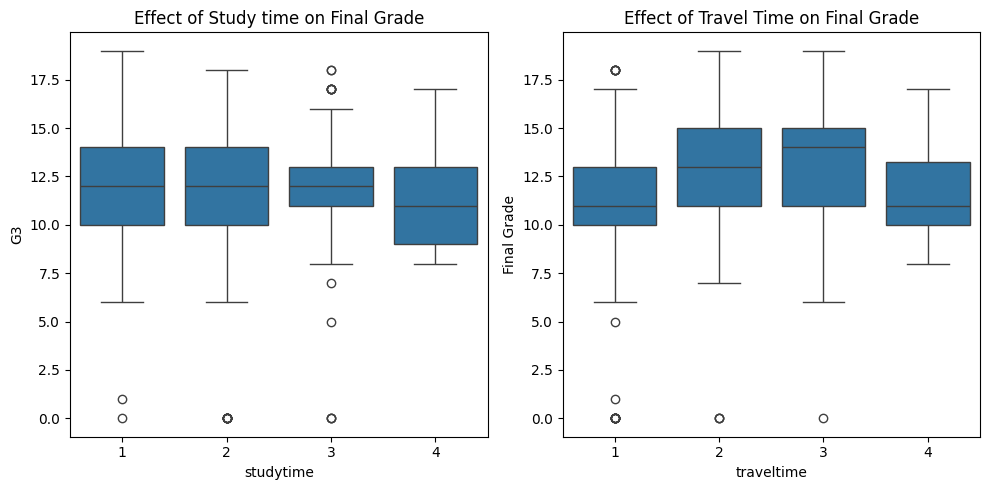

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
sns.boxplot(x='studytime', y='G3', data=portugal, ax=ax1)
plt.ylabel('Final Grade')
ax1.set_title('Effect of Study time on Final Grade')  # Set title for the first plot

ax2# Second plot
sns.boxplot(x='traveltime', y='G3', data=portugal, ax=ax2)
plt.ylabel('Final Grade')
ax2.set_title('Effect of Travel Time on Final Grade')  # Set title for the second plot

# Display the plots
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()

students with the lowest study times both produced the lowest and highest grade in the class. On the other hand, students with the third longest commute time achieved the lowest/highest grade in the class. Each of the groups in both plots show evidence of outliers which either perform much better or worse than their peers with the same times. 

## Analyzing the Absence Trend

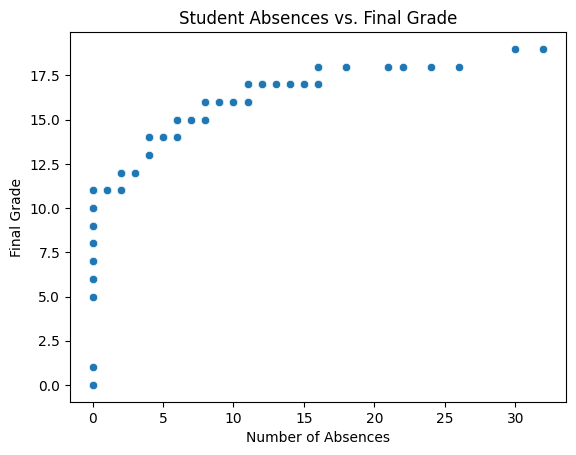

In [80]:
absence_scatter = sns.scatterplot(x="absences", y="G3", data = portugal)
absence_scatter.set_title('Student Absences vs. Final Grade')
absence_scatter.set_xlabel('Number of Absences')
absence_scatter.set_ylabel('Final Grade')
plt.show()

Above we display the relationship between the absences and the final grade. The graph shows a quadratic (sloping downward relationship) between the two variables. Higher absences leads to higher grades.

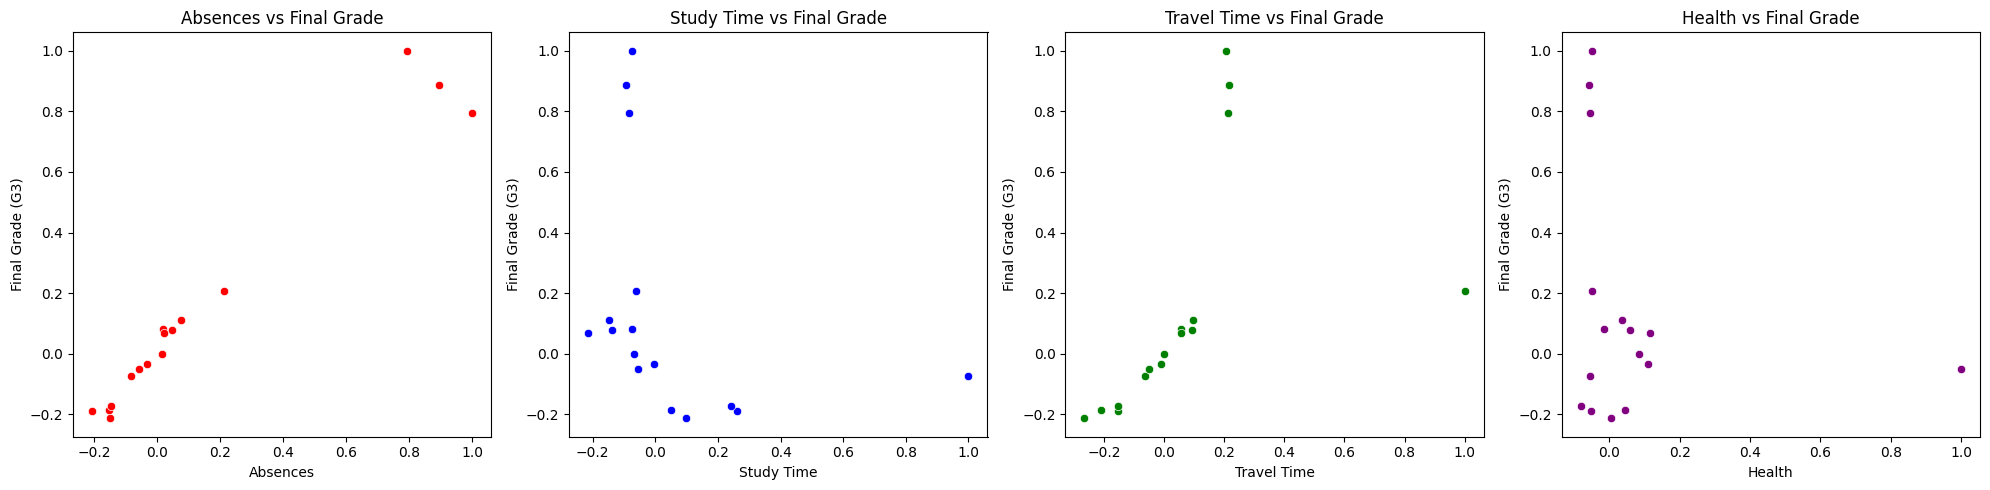

<Figure size 640x480 with 0 Axes>

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figsize as needed

# Create four scatter plots
sns.scatterplot(data= correlation_matrix, x= 'absences', y= 'G3', ax=axes[0], color= 'red')
sns.scatterplot(data= correlation_matrix, x='studytime', y= 'G3', ax=axes[1], color='blue')
sns.scatterplot(data= correlation_matrix, x='traveltime', y= 'G3', ax=axes[2], color='green')
sns.scatterplot(data= correlation_matrix, x='health', y= 'G3', ax=axes[3], color='purple')


axes[0].set_title('Absences vs Final Grade')
axes[0].set_xlabel('Absences')
axes[0].set_ylabel('Final Grade (G3)')

axes[1].set_title('Study Time vs Final Grade')
axes[1].set_xlabel('Study Time')
axes[1].set_ylabel('Final Grade (G3)')

axes[2].set_title('Travel Time vs Final Grade')
axes[2].set_xlabel('Travel Time')
axes[2].set_ylabel('Final Grade (G3)')

axes[3].set_title('Health vs Final Grade')
axes[3].set_xlabel('Health')
axes[3].set_ylabel('Final Grade (G3)')

# Improve spacing between plots
plt.tight_layout()

# Display the plots
plt.show()

# Improve spacing between plots
plt.tight_layout()

# Display the plots
plt.show()

Above we produce 4 scatter plots showing the relationship between 4 attributes and the final grade. We can surmize that absneces and travel time have a linear correlation with final grade for the class. 

## Conclusion

We used python libraries to generate algorithms to help with discovery of insights for the portugese class dataset. We also included visualizations to communicate our results and findings. Lastly, the textbook was used a reference for particular pieces of code related to sorting.